# Project 3

_Please read the handout for Project 1 on BrightSpace. You should submit your code and answers here. Feel free to add new cells if needed. _

__Please make sure you have tested your code to be working__

In [378]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.formula.api as smf
from plotnine import *

In [379]:
data = pd.read_csv("Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_All_Diagnosis-Related_Groups__DRG__-_FY2017.csv")
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88


# 1: Distributions and outliers

       Provider City  Total Discharges
127145      NEW YORK              4255
51540       MOULTRIE              2552
86152         BOSTON              2390
24998    LOS ANGELES              1949
32162        ORLANDO              1939


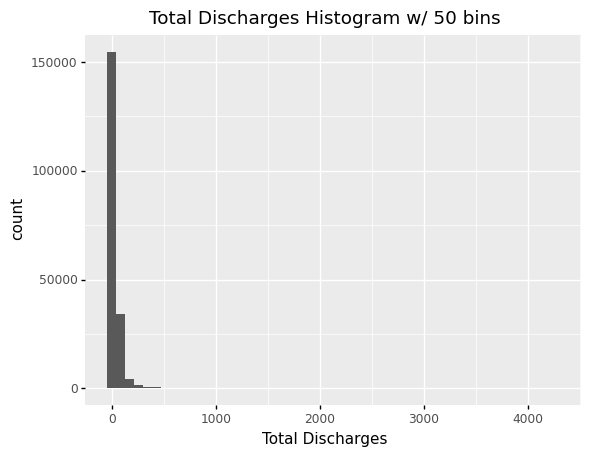

<ggplot: (8732363232940)>

In [413]:
print(data.nlargest(5, columns='Total Discharges')[['Provider City', 'Total Discharges']] )
ggplot(data=data, mapping=aes(x='Total Discharges')) + geom_histogram(bins=50) + ggtitle(title="Total Discharges Histogram w/ 50 bins")

The highest total discharges is in New York which makes sense given the city's high population density. This value is almost double the next highest value in the dataset.

       Provider City  Average Covered Charges
20318       STANFORD               3325523.36
51151        AUGUSTA               3195737.65
23517    LOS ANGELES               2681388.98
20319       STANFORD               2535362.02
126015      VALHALLA               2460377.00


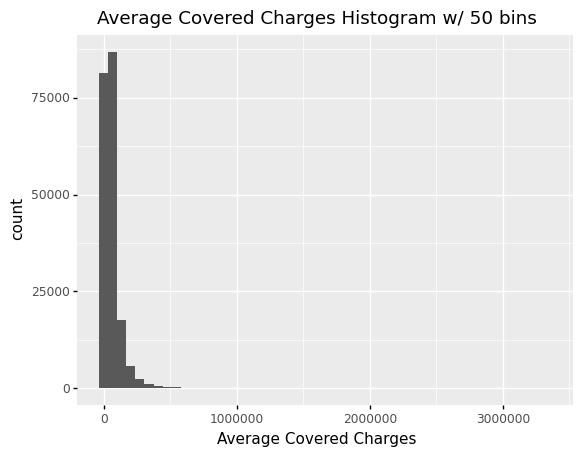

<ggplot: (8732363344990)>

In [414]:
print(data.nlargest(5, columns='Average Covered Charges')[['Provider City', 'Average Covered Charges']])
ggplot(data=data, mapping=aes(x='Average Covered Charges')) + geom_histogram(bins=50) + ggtitle("Average Covered Charges Histogram w/ 50 bins")

The highest outlier is at stanford college which makes sense with if the procedures are more advanced and also cost more, then the average covered cost would likely go up as well.

19491    SAN JOSE
Name: Provider City, dtype: object


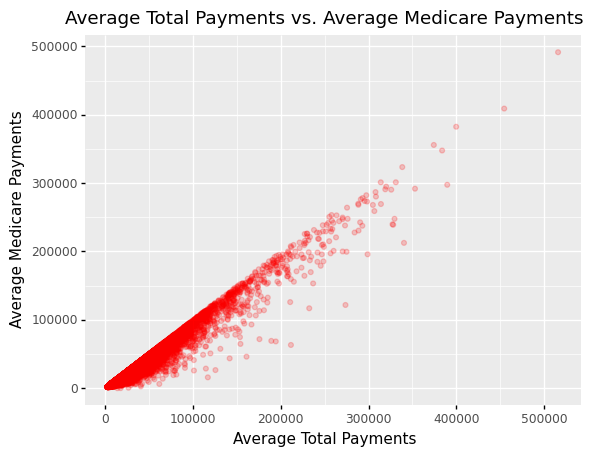

<ggplot: (8732330515113)>

In [416]:
print(data.loc[(data['Average Total Payments']>200000)&(data['Average Medicare Payments']<100000)]['Provider City'])
ggplot(data=data, mapping=aes(x='Average Total Payments', y='Average Medicare Payments')) + geom_point(color='red', alpha=.2) +\
    ggtitle("Average Total Payments vs. Average Medicare Payments")

I chose this point because it seemed the furthest from what the line of best fit would look like on this graph. The high average total payments with low average medicare payments makes sense becauese this is a fairly wealthy part of California so there would probably be less medicare coverage.

20318    STANFORD
51151     AUGUSTA
Name: Provider City, dtype: object


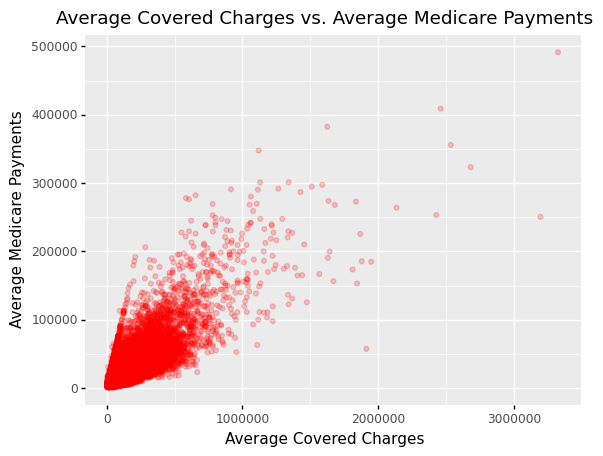

<ggplot: (8732359562216)>

In [417]:
print(data[data['Average Covered Charges']>3000000]["Provider City"])
ggplot(data=data, mapping=aes(x='Average Covered Charges', y='Average Medicare Payments')) + geom_point(color='red', alpha=.2) +\
    ggtitle("Average Covered Charges vs. Average Medicare Payments")

Stanford again makes some sense for having such high average covered charges because there are probably more expensive procedures being done at a university like that, however I do not know why Augusta would also have such high average covered charges.

# 2: Transforming Data

In [128]:
count_freq = dict(data['DRG Definition'].value_counts())
data['count_freq'] = data['DRG Definition']
data['count_freq'] = data['count_freq'].map(count_freq)
df = data[data.count_freq > 607]
df['DRG Definition'] = df['DRG Definition'].apply(lambda x: "DRG Charges " + x.split(' ')[0])

pivot = df.pivot_table(index=['Provider Id', 'Provider State'], columns='DRG Definition', values='Average Covered Charges', fill_value=0).reset_index()#.drop("DRG Definition")
pivot

<ipython-input-128-07a152ea3ee8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


DRG Definition,Provider Id,Provider State,DRG Charges 039,DRG Charges 057,DRG Charges 064,DRG Charges 065,DRG Charges 066,DRG Charges 069,DRG Charges 092,DRG Charges 100,...,DRG Charges 812,DRG Charges 853,DRG Charges 870,DRG Charges 871,DRG Charges 872,DRG Charges 897,DRG Charges 917,DRG Charges 918,DRG Charges 948,DRG Charges 981
0,10001,AL,41130.56,25434.17,46240.00,33440.09,30566.49,30004.42,25485.12,47017.81,...,20394.23,119598.10,146858.55,48672.35,30927.54,12753.20,34665.44,19832.71,0.00,93837.95
1,10005,AL,14450.08,0.00,26866.23,14336.27,13158.84,16008.44,0.00,0.00,...,11466.57,76183.18,69936.53,22616.08,15294.55,9511.50,15524.04,10599.77,12574.92,0.00
2,10006,AL,35486.58,24472.15,35674.07,24571.08,20953.62,17277.38,0.00,43030.20,...,19740.50,114219.82,138618.91,44327.62,23283.30,14717.18,28885.41,14272.07,0.00,100218.22
3,10007,AL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,11787.20,0.00,0.00,20484.80,10145.17,0.00,0.00,0.00,7629.18,0.00
4,10008,AL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,17771.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,670112,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3165,670116,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3166,670119,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3167,670120,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,147342.18,0.00,0.00,0.00,0.00,0.00,0.00


# 3: Correlation and Scatterplots

DRG Definition
DRG Charges 192    0.191293
DRG Charges 473    0.191293
DRG Charges 194    0.193022
DRG Charges 269    0.194603
dtype: float64
DRG Definition
DRG Charges 291    0.935259
DRG Charges 871    0.935259
DRG Charges 872    0.896995
DRG Charges 190    0.894884
dtype: float64


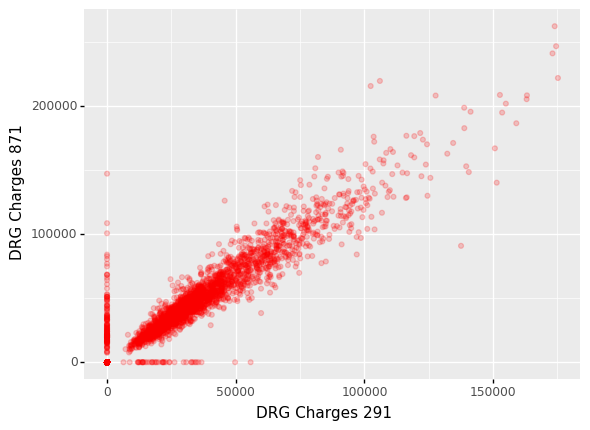

<ggplot: (8732353247675)>


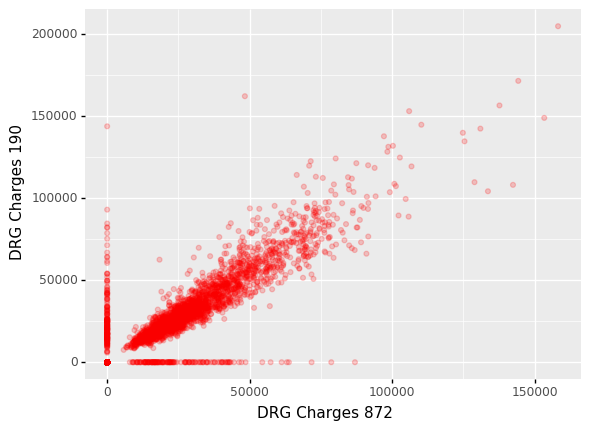

<ggplot: (8732362417457)>


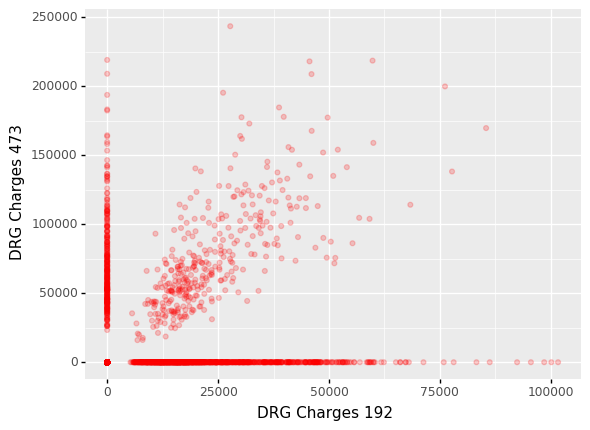

<ggplot: (8732285788058)>


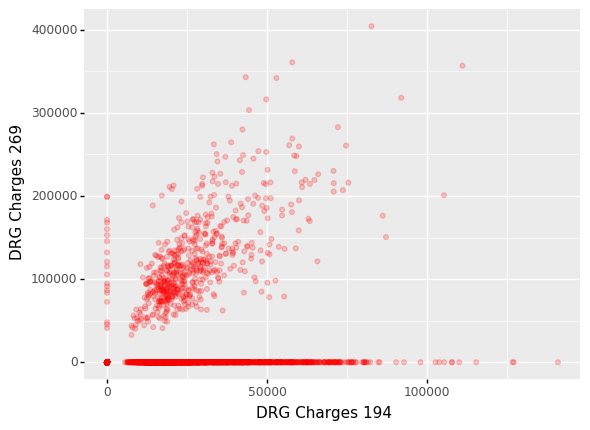

<ggplot: (8732353196439)>


In [422]:
corr = pivot.iloc[:,2:].corr()
print(corr.min().nsmallest(4))
np.fill_diagonal(corr.values, 0)
print(corr.max().nlargest(4))
print(ggplot(data=pivot, mapping=aes(x="DRG Charges 291", y="DRG Charges 871")) + geom_point(color='red', alpha=.2))
print(ggplot(data=pivot, mapping=aes(x="DRG Charges 872", y="DRG Charges 190")) + geom_point(color='red', alpha=.2))
print(ggplot(data=pivot, mapping=aes(x="DRG Charges 192", y="DRG Charges 473")) + geom_point(color='red', alpha=.2))
print(ggplot(data=pivot, mapping=aes(x="DRG Charges 194", y="DRG Charges 269")) + geom_point(color='red', alpha=.2))

# High Correlation
291 - HEART FAILURE & SHOCK W MCC   &&    871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC

These are both long procedures and medical emergencies which would explain why they have such high correlations. They both also have MCC.

872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC    &&    190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC

These are also both long procedures, however COPD is generally not an emergency.

# Low Correlation
192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC    &&    473 - CERVICAL SPINAL FUSION W/O CC/MCC

These are both planned trips so I don't know what would make these have such low correlation.

194 - SIMPLE PNEUMONIA & PLEURISY W CC     &&     269 - AORTIC AND HEART ASSIST PROCEDURES EXCEPT PULSATION BALLOON W/O MCC

The emergency level of pneumonia is far less than the second, which could explain the low correlation.

In [204]:
corr, _ = scipy.stats.pearsonr(pivot["DRG Charges 291"], pivot["DRG Charges 871"])
print("Correlation between 'DRG Charges 291' and 'DRG Charges 871': ", corr)

corr, _ = scipy.stats.pearsonr(pivot["DRG Charges 872"], pivot["DRG Charges 190"])
print("Correlation between 'DRG Charges 872' and 'DRG Charges 190': ", corr)

corr, _ = scipy.stats.pearsonr(pivot["DRG Charges 192"], pivot["DRG Charges 473"])
print("Correlation between 'DRG Charges 192' and 'DRG Charges 473': ", corr)

corr, _ = scipy.stats.pearsonr(pivot["DRG Charges 194"], pivot["DRG Charges 269"])
print("Correlation between 'DRG Charges 194' and 'DRG Charges 269': ", corr)

Correlation between 'DRG Charges 291' and 'DRG Charges 871':  0.9352589790221713
Correlation between 'DRG Charges 872' and 'DRG Charges 190':  0.8544399324847727
Correlation between 'DRG Charges 192' and 'DRG Charges 473':  0.19129326276038106
Correlation between 'DRG Charges 194' and 'DRG Charges 269':  0.22395219279070042


These correlations do support the scatterplots shown above.

# 4: Boxplots and T-Tests

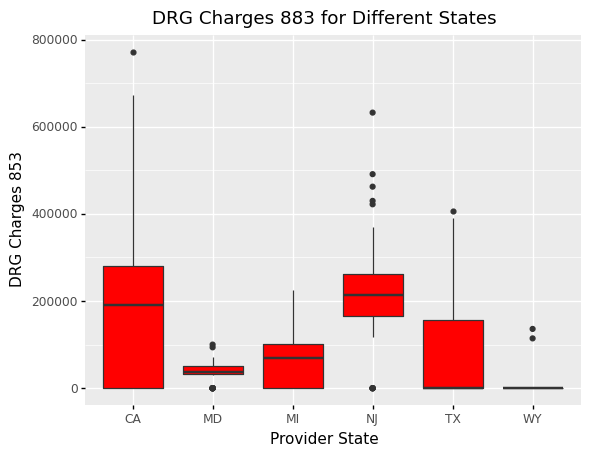

<ggplot: (8732363579426)>


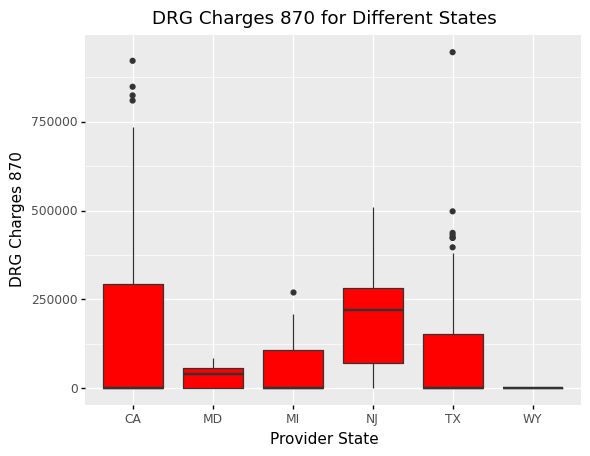

<ggplot: (8732353094678)>


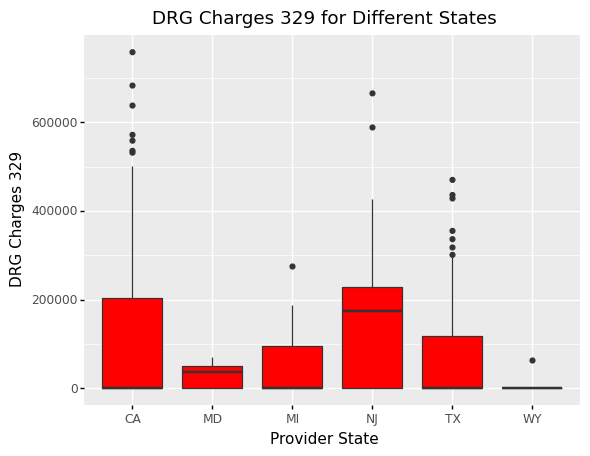

<ggplot: (8732353094870)>


In [440]:
s = pivot[pivot["Provider State"].isin(["NJ", "TX", "CA", "MI", "WY", "MD"])]
print(ggplot(data=s, mapping=aes(x='Provider State', y="DRG Charges 853")) + geom_boxplot(fill='red') + ggtitle("DRG Charges 883 for Different States"))
print(ggplot(data=s, mapping=aes(x='Provider State', y="DRG Charges 870")) + geom_boxplot(fill='red') + ggtitle("DRG Charges 870 for Different States"))
print(ggplot(data=s, mapping=aes(x='Provider State', y="DRG Charges 329")) + geom_boxplot(fill='red') + ggtitle("DRG Charges 329 for Different States"))


In [349]:
NJ = pivot[pivot["Provider State"]=="NJ"]["DRG Charges 853"]
MD = pivot[pivot["Provider State"]=="MD"]["DRG Charges 853"]
test = scipy.stats.ttest_ind(NJ, MD)
print("Test Statistic: ", test.statistic)
print("P-Value: ", test.pvalue)

Test Statistic:  10.465043259329375
P-Value:  1.8415155135548436e-18


The null hypothesis is that the means of the Maryland and New Jersey are the same for 'DRG Charges 835'. The alternative hypothesis is that the means are differentfor this DRG Charge. Because the p-value is less than .05 we reject the null hypothesis, and can conclude that with a 95% confidence level they have different means.

In [368]:
NJ = pivot[pivot["Provider State"]=="NJ"][["DRG Charges 853", "DRG Charges 870", "DRG Charges 329"]]
MD = pivot[pivot["Provider State"]=="MD"][["DRG Charges 853", "DRG Charges 870", "DRG Charges 329"]]
NJ = NJ.sample(47)
NJ = NJ.melt()['value']
MD = MD.melt()['value']
test = scipy.stats.ttest_rel(NJ, MD)
print("Paired T-Test Test Statistic: ", test.statistic)
print("Paired T-Test P-Value: ", test.pvalue)
test = scipy.stats.ttest_ind(NJ, MD)
print("Unpaired T-Test Test Statistic: ", test.statistic)
print("Unpaired T-Test P-Value: ", test.pvalue)

Paired T-Test Test Statistic:  13.72322606212357
Paired T-Test P-Value:  1.0815815911772763e-27
Unpaired T-Test Test Statistic:  13.69761962928183
Unpaired T-Test P-Value:  4.903200249431971e-33


The null hypothesis is that the means for all three DRG Charges is the same for Maryland and New Jersy for both the paired and unpaired t-test. The alternative hypothesis is that the means for these two states is different accross the three DRG Charges. Because the p-value is less than .05 for both t-tests we can conclued that with 95% confidence that the means of Maryland and New Jersey are different for these three DRG Charges